In [3]:
import os
import sys
sys.path.append('../../')

# EIS Simulation Related Functions
import math

# Import ECM-2 R(QR)(QR)
from circuits.circuit_pack import RaQRbaQRb

# Import ECM-9 R(Q(R(QR)))
from circuits.circuit_pack import RaQaRaQRbbb

In [4]:
from utils.visualize_utils.impedance_plots import nyquist_plot
from utils.file_utils.exp_data_readers import read_folder, DTA_reader

In [37]:
import matplotlib.pyplot as plt
def nyquist_raw_sim_plot(z_raw_list, z_sim_list,x_lim=[0, 50000], y_lim=[0, 50000], grid_flag=False):
    z_raw_real_list = [z.real for z in z_raw_list]
    z_raw_imag_list = [z.imag for z in z_raw_list]
    z_raw_inv_imag_list = [-1 * z_imag for z_imag in z_raw_imag_list]

    fig = plt.figure()
#     print(len(z_raw_real_list), z_raw_real_list)
#     print(len(z_raw_inv_imag_list), z_raw_inv_imag_list)
    plt.scatter(z_raw_real_list, z_raw_inv_imag_list,label='Raw EIS')
    
    z_sim_real_list = [z.real for z in z_sim_list]
    z_sim_imag_list = [z.imag for z in z_sim_list]
    z_sim_inv_imag_list = [-1 * z_imag for z_imag in z_sim_imag_list]

    plt.plot(z_sim_real_list, z_sim_inv_imag_list, '^--', color='red', label='Fitted EIS')

    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xlabel('Z$_{real}$ [$\Omega$]')
    plt.ylabel('-Z$_{imag}$ [$\Omega$]')
    plt.grid(grid_flag)
    plt.legend()
    plt.show()

In [25]:
# read raw data
def read_Zraw(folder, file_no = '14-15'):
    # 这个路径是给刘鹏处理论文中的数据路径
    #     eis_fp = os.path.join('../../../people/liupeng/eis_on_ni_fe', file_no,'EISPOT-R01-C01.DTA')

    # 这个路径是dpfc论文图12中相关数据的路径
#     eis_fp = os.path.join('../../playground/liuPeng/eis_data_removed/R13', file_no,'EISPOT-R01-C01.DTA')
    
    eis_fp = os.path.join(folder, file_no,'EISPOT-R01-C01.DTA')

    print(eis_fp)
    exp_area = 1.2566370614359172e-05
    dta_reader = DTA_reader(file_path=eis_fp, data_type_selection=True)
    eis_dict = dta_reader.reader()

    z_real_list = eis_dict['z_real']
    z_img_list = eis_dict['z_img']
    
    normed_z_list = [zr * exp_area + 1j * zi * exp_area for zr, zi in zip(z_real_list, z_img_list)]
    
#     fre_list = eis_dict['fre']
    fre_list = eis_dict['f']
    return normed_z_list, fre_list
    
# simulate fitted data
import math

def sim_ecm2_Z(fre_list, ecm2_para):
    R0 = ecm2_para[0]
    Q0_pair = ecm2_para[1:3]
    R1 = ecm2_para[3]
    Q1_pair = ecm2_para[4:6]
    R2 = ecm2_para[6]
    w_list = [2 * math.pi * f for f in fre_list]
    z_sim_list = [RaQRbaQRb(w, R0, Q0_pair, R1, Q1_pair, R2) for w in w_list]
    return z_sim_list

def sim_ecm9_Z(fre_list, ecm9_para):
    R0 = ecm9_para[0]
    Q0_pair = ecm9_para[1:3]
    R1 = ecm9_para[3]
    Q1_pair = ecm9_para[4:6]
    R2 = ecm9_para[6]
    w_list = [2 * math.pi * f for f in fre_list]
    z_sim_list = [RaQaRaQRbbb(w, R0, Q0_pair, R1, Q1_pair, R2) for w in w_list]
    return z_sim_list

In [26]:
folder = '../../playground/liuPeng/eis_data_removed/R13'
normed_z_raw_list, fre_list = read_Zraw(folder, file_no = '13-11')

../../playground/liuPeng/eis_data_removed/R13\13-11\EISPOT-R01-C01.DTA


In [27]:
fre_list

[100078.1,
 63140.62,
 39890.62,
 25171.88,
 15890.62,
 10078.13,
 6328.125,
 3984.375,
 2527.573,
 1577.524,
 998.264,
 627.7902,
 397.9953,
 252.4038,
 158.3615,
 100.4464,
 63.3446,
 38.42213,
 24.93351,
 15.625,
 9.93114,
 6.317385,
 3.945707,
 2.504006,
 1.584686,
 0.999041,
 0.633446,
 0.400641,
 0.2520161,
 0.1588983,
 0.1001603]

In [28]:
ecm2_para = [1e-10,6.975046101173382e-05,1.0,214075.72923919684,0.0003142555249340953,0.6981341767395142,10000000000.0]
z_sim_list = sim_ecm2_Z(fre_list, ecm2_para)

In [29]:
z_sim_list

[(0.13004950333094065-0.27619775089183757j),
 (0.17937281761943513-0.3856408870899409j),
 (0.24716738624521345-0.5387994931360266j),
 (0.34086836669992654-0.754820179424667j),
 (0.4699550952104878-1.0592867492837008j),
 (0.6458327556824981-1.4847951879995287j),
 (0.8937510085869254-2.1020245073562216j),
 (1.2344750224763377-2.9780179727204734j),
 (1.6961861008164902-4.207717336840275j),
 (2.357228877785339-6.039403983569159j),
 (3.244470420339295-8.607456089675392j),
 (4.485101829370089-12.373590400578601j),
 (6.165431051043247-17.746043607613842j),
 (8.473261487129964-25.54934953960314j),
 (11.732798432045263-37.267793015715924j),
 (16.123614417480763-54.1280683575483j),
 (22.24843999479473-79.36028562952364j),
 (31.54951330769266-120.82826448376252j),
 (42.684702459861654-174.60813810276267j),
 (59.19720162003617-261.18358637062965j),
 (81.33842935886976-387.7646403822396j),
 (111.81683185142674-577.873502230234j),
 (156.03110473251547-879.2675257828555j),
 (216.06414195353324-1324.6

In [30]:
z_sim_real_list = [z.real for z in z_sim_list]
print(z_sim_real_list)

[0.13004950333094065, 0.17937281761943513, 0.24716738624521345, 0.34086836669992654, 0.4699550952104878, 0.6458327556824981, 0.8937510085869254, 1.2344750224763377, 1.6961861008164902, 2.357228877785339, 3.244470420339295, 4.485101829370089, 6.165431051043247, 8.473261487129964, 11.732798432045263, 16.123614417480763, 22.24843999479473, 31.54951330769266, 42.684702459861654, 59.19720162003617, 81.33842935886976, 111.81683185142674, 156.03110473251547, 216.06414195353324, 301.71550472848975, 427.36681300195835, 614.5182845573066, 914.0992193771858, 1436.3922240241513, 2413.5337814184754, 4404.703248636082]


In [31]:
z_sim_imag_list = [z.imag for z in z_sim_list]
print(z_sim_imag_list)

[-0.27619775089183757, -0.3856408870899409, -0.5387994931360266, -0.754820179424667, -1.0592867492837008, -1.4847951879995287, -2.1020245073562216, -2.9780179727204734, -4.207717336840275, -6.039403983569159, -8.607456089675392, -12.373590400578601, -17.746043607613842, -25.54934953960314, -37.267793015715924, -54.1280683575483, -79.36028562952364, -120.82826448376252, -174.60813810276267, -261.18358637062965, -387.7646403822396, -577.873502230234, -879.2675257828555, -1324.6708723265301, -2008.840883756753, -3068.9445591415206, -4680.447871356768, -7177.359451900997, -11091.890422780001, -17129.891784209285, -26437.785119660573]


../../../people/liupeng/eis_on_ni_fe\14-15\EISPOT-R01-C01.DTA
line: 53 b'\t#\ts\tHz\tohm\tohm\tV\tohm\t\xb0\tA\tV\t#\r\n' occured UnicodeDecodeError


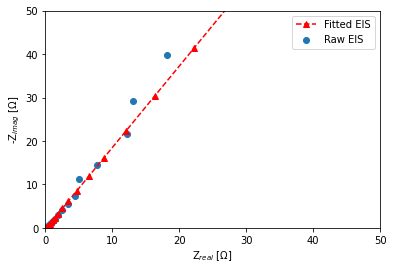

In [38]:
folder = '../../../people/liupeng/eis_on_ni_fe'
z_raw_list, fre_list = read_Zraw(folder,file_no = '14-15')
ecm9_para = [0.15397170479976346,0.0016925147452155503,0.6879551686438369,237904535452301.78,0.03904648512690728,0.6784022866336672,651538565698248.2]
z_sim_list = sim_ecm9_Z(fre_list, ecm9_para)

nyquist_raw_sim_plot(z_raw_list, z_sim_list,x_lim=[0, 50], y_lim=[0, 50], grid_flag=False)

../../../people/liupeng/eis_on_ni_fe\15-14\EISPOT-R01-C01.DTA
line: 53 b'\t#\ts\tHz\tohm\tohm\tV\tohm\t\xb0\tA\tV\t#\r\n' occured UnicodeDecodeError


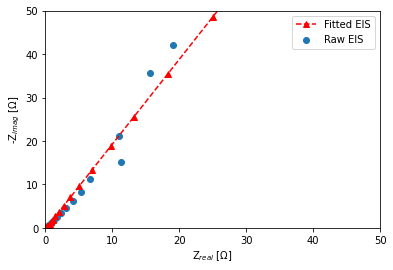

In [40]:
z_raw_list, fre_list = read_Zraw(folder, file_no = '15-14')
ecm9_para = [0.14048947232020456,0.0010220734166856717,0.6984203787702006,75837023797.51007,0.027887497220869632,0.963992626188234,2735226088314.324]
z_sim_list = sim_ecm9_Z(fre_list, ecm9_para)

nyquist_raw_sim_plot(z_raw_list, z_sim_list,x_lim=[0, 50], y_lim=[0, 50], grid_flag=False)